## PREDICTION OF SALARY

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Reading the Datasets from csv files**

In [2]:
df = pd.read_csv('ML Case Study.csv', header=0)
colleges = pd.read_csv('Colleges.csv', header=0)
cities = pd.read_csv('cities.csv', header=0)

### *Performing Data Cleaning and Pre-Processing*

In [3]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   int64  
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 99.4+ KB


In [5]:
# No Null values are found in the Dataset
df.isnull().sum()

College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64

In [6]:
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


### Transforming Variables to Numeric based on criteria for the Variables College and City

In [7]:
Tier1 = colleges['Tier 1'].tolist()
Tier2 = colleges['Tier 2'].tolist()
Tier3 = colleges['Tier 3'].tolist()

In [8]:
for item in df.College:
    if item in Tier1:
        df['College'].replace(item,1,inplace=True)
    elif item in Tier2:
        df['College'].replace(item,2,inplace=True)
    elif item in Tier3:
        df['College'].replace(item,3,inplace=True)
        
        

In [9]:
Metro = cities['Metro City'].tolist()
Non_Metro = cities['Non-metro cities'].tolist()

In [10]:
for item in df.City:
    if item in Metro:
        df['City'].replace(item,1,inplace=True)
    elif item in Non_Metro:
        df['City'].replace(item,0,inplace=True)

In [11]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523,3,66,19,71406.58
1,2,0,Executive,57081,1,84,18,68005.87
2,3,0,Executive,60347,2,52,28,76764.02
3,3,0,Executive,49010,2,81,33,82092.39
4,1,0,Executive,57879,4,74,32,73878.10


* Tier-1 Colleges are given the value 1
* Tier-2 Colleges are given the value 2
* Tier-3 Colleges are given the value 3

* Metro Cities are represented by 1
* Non-Metro Cities are represented by 0

#### Dummy values are created for the variable "Role" where Executive is assigned as '0' and Manager is assigned as '1'

In [12]:
df['Role'].value_counts()

Role
Executive    1261
Manager       328
Name: count, dtype: int64

<Axes: xlabel='Role', ylabel='count'>

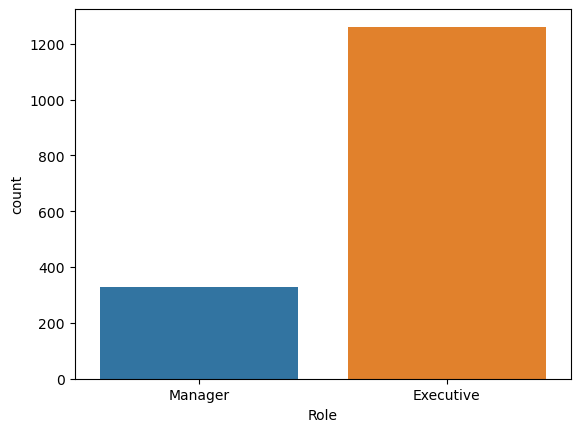

In [13]:
sns.countplot(x = 'Role', data=df)

<Axes: xlabel='City', ylabel='count'>

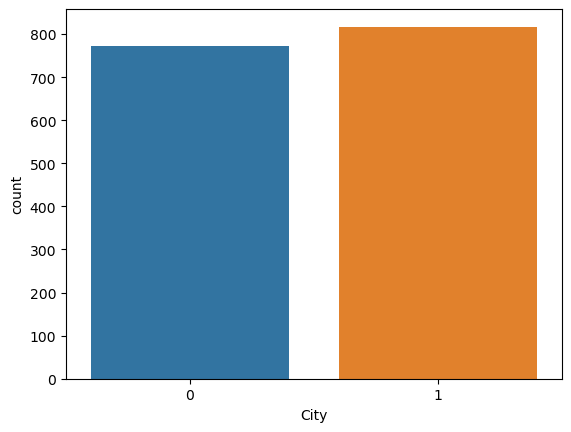

In [14]:
sns.countplot(x='City', data=df)

In [15]:
df_R = pd.get_dummies(df['Role'],drop_first=True)

In [16]:
df_R.head()

,Manager
0,True
1,False
2,False
3,False
4,False


In [17]:
df = pd.concat([df, df_R], axis=1)

In [18]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Manager
0,2,0,Manager,55523,3,66,19,71406.58,True
1,2,0,Executive,57081,1,84,18,68005.87,False
2,3,0,Executive,60347,2,52,28,76764.02,False
3,3,0,Executive,49010,2,81,33,82092.39,False
4,1,0,Executive,57879,4,74,32,73878.10,False


In [19]:
del df['Role']

In [20]:
df.rename({"Manager":"Role"}, axis=1, inplace=True)

In [21]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role
0,2,0,55523,3,66,19,71406.58,True
1,2,0,57081,1,84,18,68005.87,False
2,3,0,60347,2,52,28,76764.02,False
3,3,0,49010,2,81,33,82092.39,False
4,1,0,57879,4,74,32,73878.10,False


### Checking for Any Outliers in the Dataset

<Axes: xlabel='Previous CTC'>

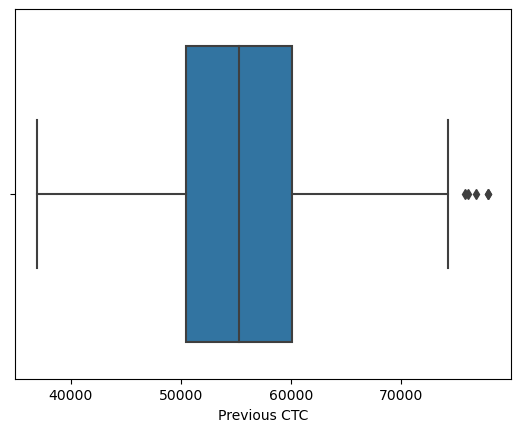

In [22]:
sns.boxplot(x= 'Previous CTC', data=df)

C:\Users\aelen\AppData\Local\Temp\ipykernel_4968\4254670341.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Previous CTC'])


<Axes: xlabel='Previous CTC', ylabel='Density'>

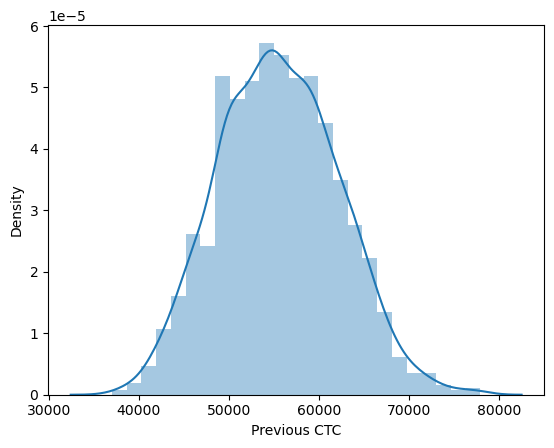

In [23]:
sns.distplot(df['Previous CTC'])

<Axes: xlabel='Graduation Marks'>

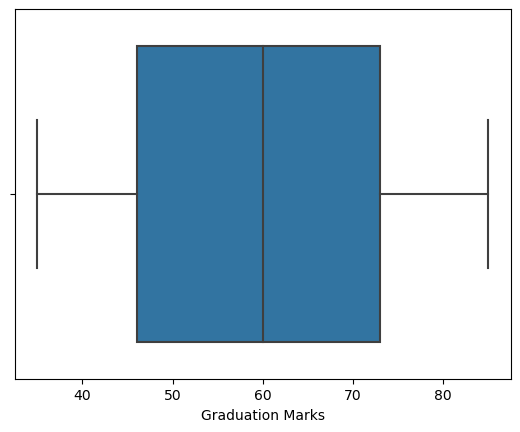

In [24]:
sns.boxplot(x = 'Graduation Marks', data=df)

C:\Users\aelen\AppData\Local\Temp\ipykernel_4968\273183404.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Graduation Marks'])


<Axes: xlabel='Graduation Marks', ylabel='Density'>

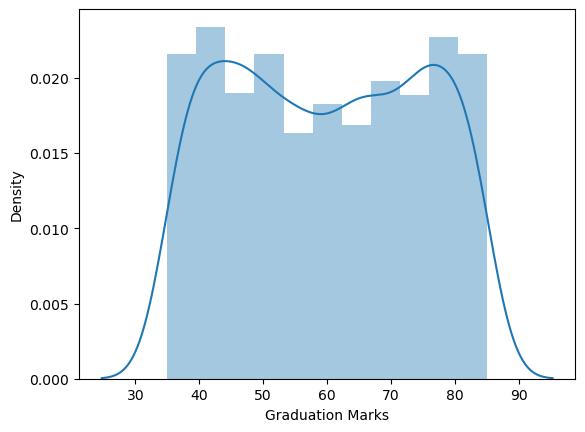

In [25]:
sns.distplot(df['Graduation Marks'])

<Axes: xlabel='EXP (Month)'>

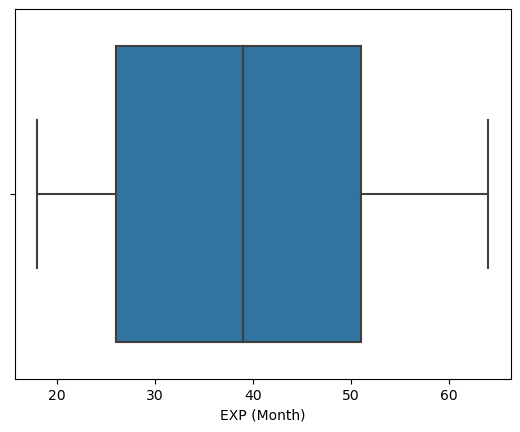

In [26]:
sns.boxplot(x = 'EXP (Month)', data=df)

C:\Users\aelen\AppData\Local\Temp\ipykernel_4968\457456925.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['EXP (Month)'])


<Axes: xlabel='EXP (Month)', ylabel='Density'>

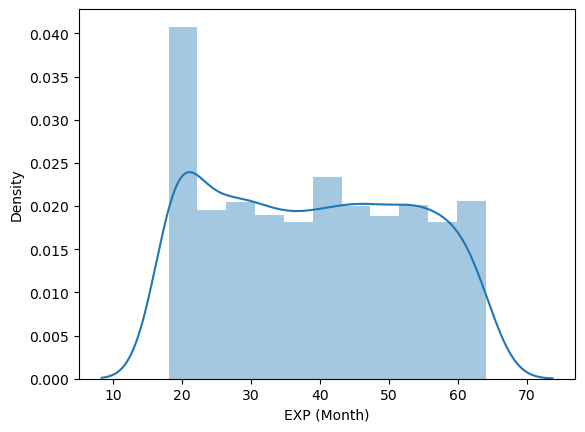

In [27]:
sns.distplot(df['EXP (Month)'])

**Suspected Outliers were found in the variable 'Previous CTC' and thus capping them**

In [28]:
uv = np.percentile(df['Previous CTC'],[75])[0]
lv = np.percentile(df['Previous CTC'],[25])[0]
uv, lv

(60109.0, 50518.0)

In [29]:
IQR = uv-lv
IQR

9591.0

In [30]:
IQR_n = 1.5*IQR
IQR_n

14386.5

In [31]:
df[df['Previous CTC']<(lv-IQR_n)]
# No outliers on the lower side

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role


In [32]:
df[df['Previous CTC']>(uv+IQR_n)]
# Few Outliers are found on the upper side

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role
116,3,1,77911,1,50,58,87831.62,False
860,1,1,75785,4,63,37,110338.25,True
1088,3,1,76815,4,75,52,82684.17,False
1317,1,0,76070,2,54,18,58309.56,False
1454,1,1,77911,1,50,58,87831.62,False


In [33]:
# Capping the outliers on the higher side
df['Previous CTC'][df['Previous CTC']>(uv+IQR_n)] = uv+IQR_n

C:\Users\aelen\AppData\Local\Temp\ipykernel_4968\275009964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Previous CTC'][df['Previous CTC']>(uv+IQR_n)] = uv+IQR_n


<Axes: xlabel='Previous CTC'>

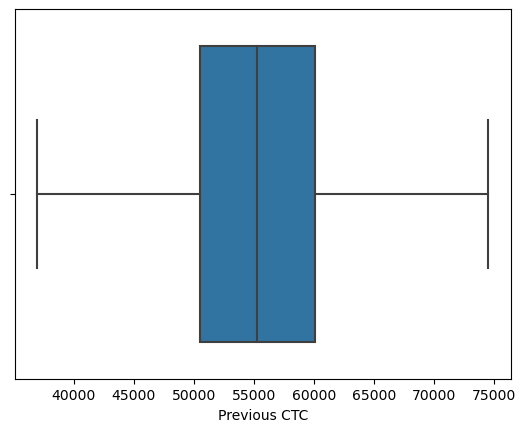

In [34]:
sns.boxplot(x = 'Previous CTC', data=df)
# The outliers are capped for the variable 'Previous CTC' which is shown in the box plot below.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role                 1589 non-null   bool   
dtypes: bool(1), float64(2), int64(5)
memory usage: 88.6 KB


In [36]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role
0,2,0,55523.0,3,66,19,71406.58,True
1,2,0,57081.0,1,84,18,68005.87,False
2,3,0,60347.0,2,52,28,76764.02,False
3,3,0,49010.0,2,81,33,82092.39,False
4,1,0,57879.0,4,74,32,73878.10,False


In [37]:
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.00000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55510.89270,2.528634,59.855255,39.044682,75353.278798
std,0.838330,0.499957,6632.04596,1.123918,14.935139,14.108875,12587.288237
min,1.000000,0.000000,36990.00000,1.000000,35.000000,18.000000,53020.320000
25%,1.000000,0.000000,50518.00000,2.000000,46.000000,26.000000,66902.350000
50%,2.000000,1.000000,55291.00000,3.000000,60.000000,39.000000,73028.670000
75%,3.000000,1.000000,60109.00000,4.000000,73.000000,51.000000,80588.670000
max,3.000000,1.000000,74495.50000,4.000000,85.000000,64.000000,123416.990000


### Data Pre-Processing Inferences:
* There were no Null-Values
* All the variables are transformed to numeric so that they can be used in Modelling
* Few suspected outliers were found in the 'Previous CTC' variable and they were capped for better model performance

## *Visualization of Data to Derive More Insights*

C:\Users\aelen\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


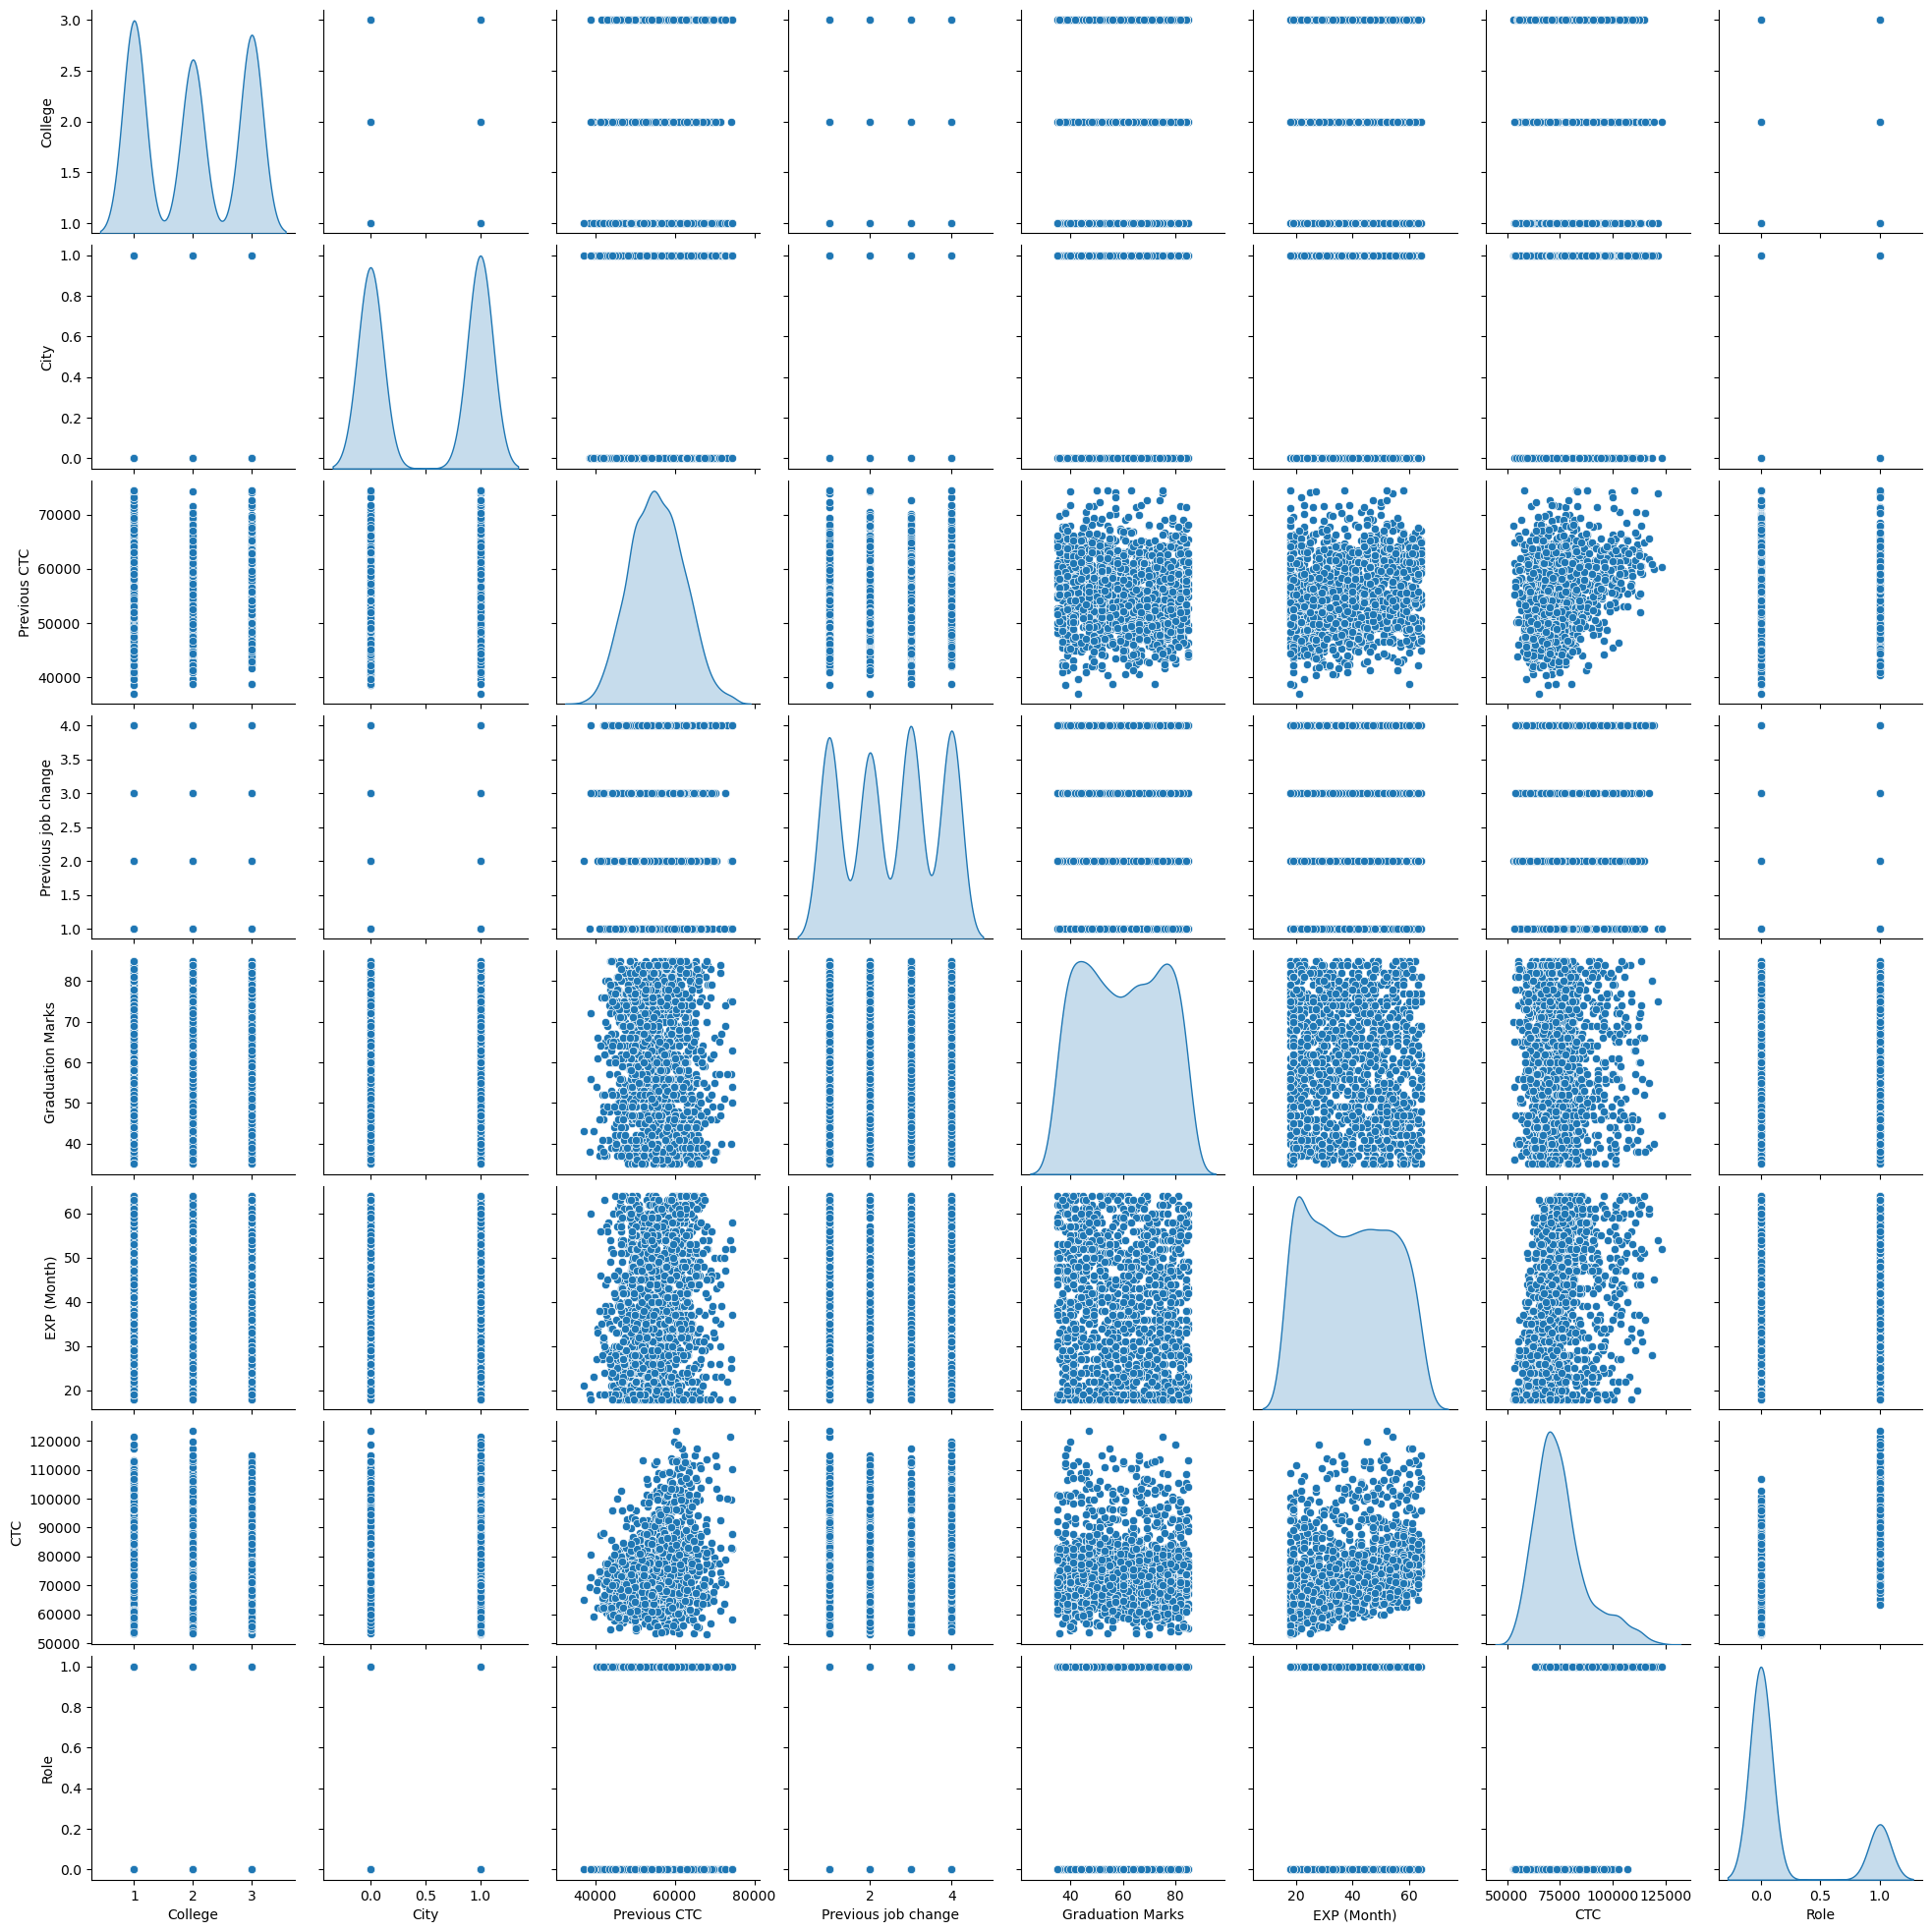

In [38]:
# # Checking correlation with the dependant variable which is CTC
sns.pairplot(data=df, diag_kind='kde')

<Axes: xlabel='Previous job change', ylabel='count'>

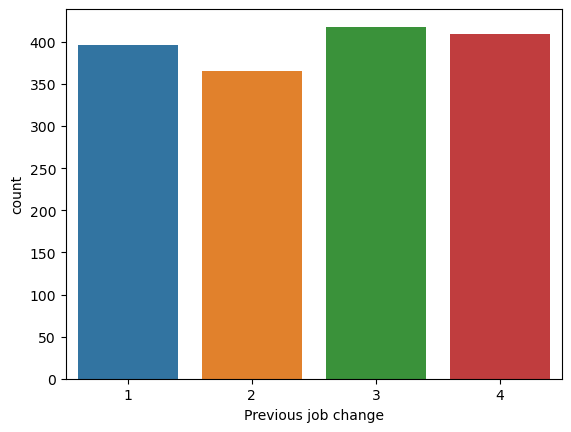

In [39]:
# Plot information about the count of Previous job changes
sns.countplot(x = 'Previous job change', data=df)

<Axes: xlabel='Role', ylabel='CTC'>

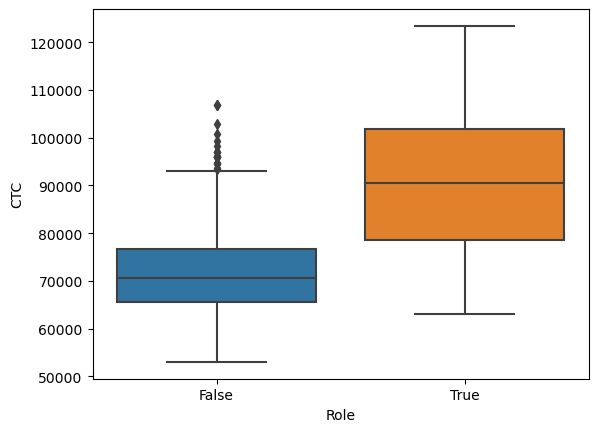

In [40]:
# Plot describing the Range of CTC for Executives - 0 and Managers - 1
sns.boxplot(x='Role', y='CTC', data=df)

<Axes: xlabel='Previous job change', ylabel='CTC'>

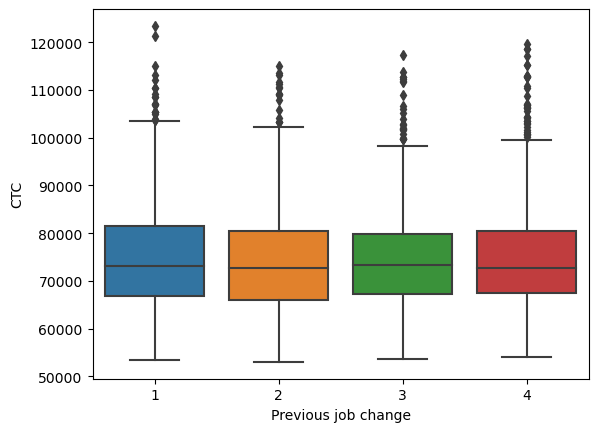

In [41]:
# Plot describind the CTC based on the Previous Job change
sns.boxplot(x='Previous job change', y='CTC', data=df)

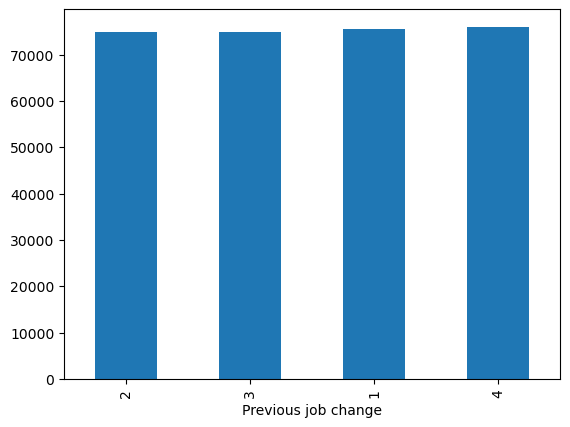

In [42]:
# Plot Information about Previous job change Vs Average CTC
j_change = df.groupby('Previous job change')['CTC'].mean().sort_values(ascending=True)
j_change.plot(kind='bar',x='Previous job change',y='CTC')
plt.show()

<Axes: xlabel='College', ylabel='count'>

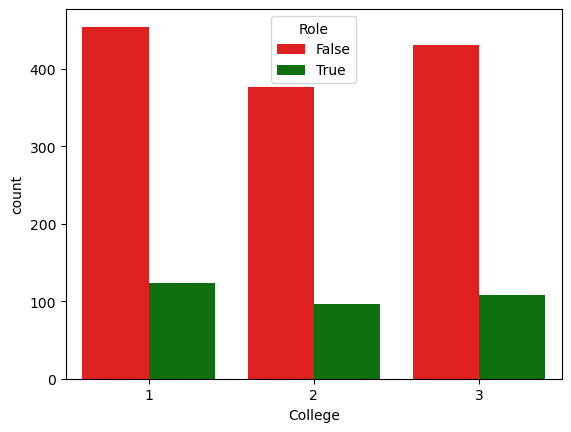

In [43]:
# Plot information about the count of Executives - '0' and Managers - ' 1' from the all the three College Tiers
sns.countplot(x = df['College'], hue = df['Role'], dodge = True, palette = ['r','g'])

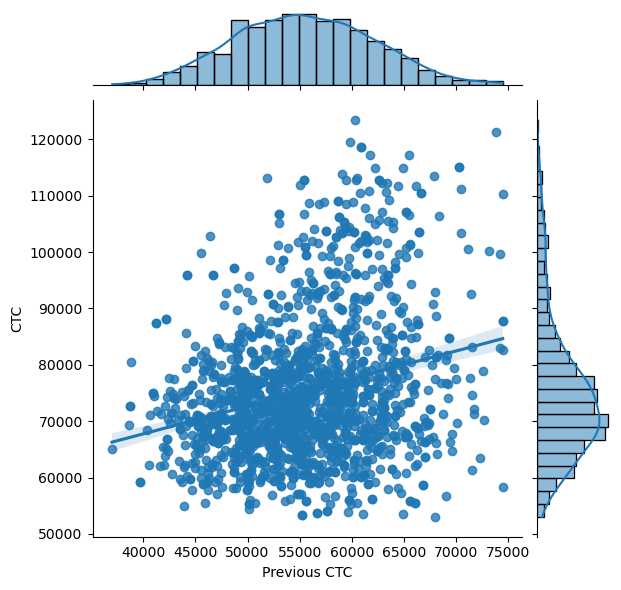

In [44]:
# Checking whether Previous CTC and CTC have a linear relationship
sns.jointplot(x='Previous CTC',y='CTC',data=df,kind='reg')

C:\Users\aelen\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


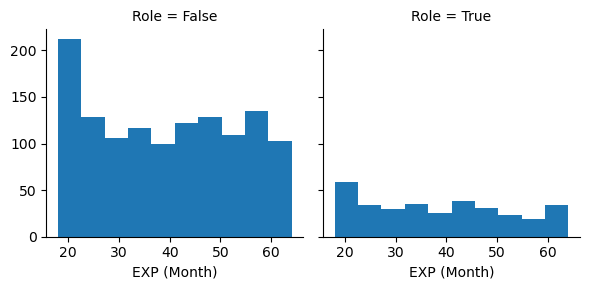

In [45]:
g = sns.FacetGrid(data=df,col='Role')
g.map(plt.hist,'EXP (Month)')

<Axes: >

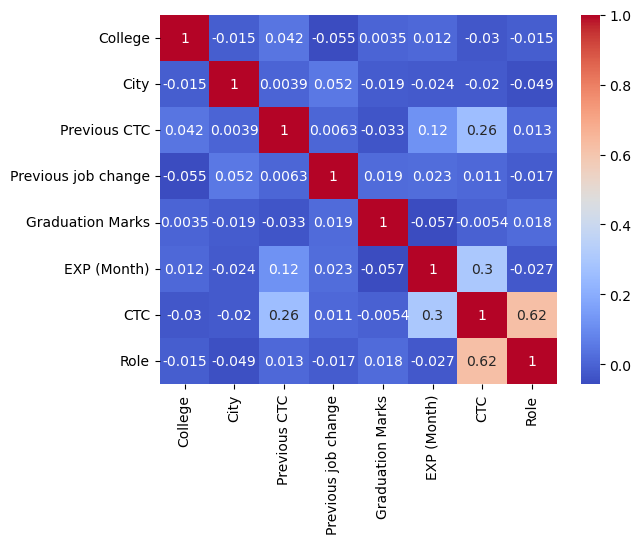

In [46]:
# Using a heatmap to check correlation among the variables
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

It can be see than the variable Role has a strong correlation with the CTC variable.

## MULTIPLE LINEAR REGRESSION MODEL TO CHECK EFFICIENCY

#### DATA IS STANDARDIZED AND FIT INTO A LINEAR REGRESSION MODEL

In [47]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn import preprocessing

In [48]:
X = df.drop(['CTC'], axis=1)
y = df['CTC']

In [49]:
# Splitting the data into Test and Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [50]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1271, 7) (318, 7) (1271,) (318,)


In [51]:
lreg = LinearRegression()

In [52]:
# Standarding the data using the Standard scaler technique
scaler = preprocessing.StandardScaler().fit(X_train)

In [53]:
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [54]:
# Fitting the standardized data into the Linear Regression model
lreg.fit(X_train_s, y_train)

LinearRegression()

In [55]:
print(lreg.intercept_, lreg.coef_)

75338.86468135325 [-371.45351961  112.61234884 2751.65947022   33.67783743  -48.04262322
 3494.70719454 7851.46499814]


In [56]:
y_test_p = lreg.predict(X_test_s)
y_train_p = lreg.predict(X_train_s)

In [57]:
r2_score(y_train, y_train_p)

0.5263067437910343

In [58]:
r2_score(y_test, y_test_p)

0.5619887604305385

In [59]:
print("MSE:", metrics.mean_squared_error(y_test,y_test_p))
print('MAE:', metrics.mean_absolute_error(y_test,y_test_p))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_test_p)))
print("R2 score:", metrics.r2_score(y_test, y_test_p))

MSE: 72371698.08585751
MAE: 6859.42701563543
RMSE: 8507.155698931196
R2 score: 0.5619887604305385


### OBSERVATIONS
* The train score is 52% whereas the test score is 56%
* The data may be underfitting
* Regularization technique such as Ridge regression is tried as it incorporates all the variables in the model without removing them.

#### RIDGE REGULARIZATION IS USED TO IMPROVE THE EFFICIENCY BY TUNING THE MODEL

In [60]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve

In [61]:
lrid = Ridge()

In [62]:
lrid.fit(X_train_s, y_train)

Ridge()

**The Standardized train and test data used in the above Linear Regression model
is being used here as well**

In [63]:
y_test_pr = lrid.predict(X_test_s)
y_train_pr = lrid.predict(X_train_s)

In [64]:
y_test_pr

array([ 86597.81236559,  91967.18765995,  70774.63649141,  68852.32799052,
        62715.82632351,  64957.65401215, 102470.36809285,  71164.47947869,
        84588.93097285,  75849.38941825,  75672.12865179,  74569.84190105,
        75218.76676851,  76734.9751779 ,  70643.53190165,  77977.99867365,
        79265.04915024,  67023.15115819,  71529.93104521,  64910.40375846,
        75567.64739282,  71261.82518476,  78953.44207161,  67366.01865806,
        71235.99523302,  73306.9546272 ,  66479.17895357,  72201.54068263,
        68309.77366918,  72280.3806216 ,  69488.37965249,  91797.66472479,
        77179.38428198,  95573.31201565,  88933.08316477,  71595.84767815,
        71645.07342708,  73046.78153538,  67556.89610811,  70060.2140284 ,
        89140.60360925,  69191.950736  ,  65439.46597767,  95735.06991564,
        72798.21883038,  75890.7991497 ,  75482.28194356,  64846.04944194,
        76887.3324709 ,  71312.33411129,  73788.4332732 ,  70518.97299406,
        81115.6892126 ,  

In [65]:
r2_score(y_train, y_train_pr)

0.5263064228917953

In [66]:
r2_score(y_test, y_test_pr)

0.5619304718913498

In [67]:
print("MSE:", metrics.mean_squared_error(y_test,y_test_pr))
print('MAE:', metrics.mean_absolute_error(y_test,y_test_pr))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_test_pr)))
print("R2 score:", metrics.r2_score(y_test, y_test_pr))

MSE: 72381328.98154908
MAE: 6860.104000801682
RMSE: 8507.72172685197
R2 score: 0.5619304718913498


**The alpha value by default is 1, thus the alpha value for which the mean scores is maximum has to be used
for fitting the model.
Thus, a range of values are taken and the correct value of alpha is choosen**

In [68]:
param_range = np.logspace(-2, 8 ,100)

In [69]:
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

**Validation curve is used to find the maximum score of R2 and its corresponding alpha value with which the model could be fit.**

In [70]:
train_scores, test_scores = validation_curve(Ridge(), X_train_s, y_train, param_name = "alpha", param_range = param_range, scoring = 'r2')

In [71]:
train_scores

array([[5.10935175e-01, 5.22959236e-01, 5.26596062e-01, 5.37384498e-01,
        5.36920502e-01],
       [5.10935175e-01, 5.22959236e-01, 5.26596062e-01, 5.37384498e-01,
        5.36920502e-01],
       [5.10935175e-01, 5.22959236e-01, 5.26596062e-01, 5.37384498e-01,
        5.36920502e-01],
       [5.10935175e-01, 5.22959236e-01, 5.26596062e-01, 5.37384498e-01,
        5.36920502e-01],
       [5.10935175e-01, 5.22959236e-01, 5.26596062e-01, 5.37384498e-01,
        5.36920502e-01],
       [5.10935175e-01, 5.22959236e-01, 5.26596061e-01, 5.37384497e-01,
        5.36920501e-01],
       [5.10935174e-01, 5.22959235e-01, 5.26596061e-01, 5.37384497e-01,
        5.36920501e-01],
       [5.10935174e-01, 5.22959235e-01, 5.26596061e-01, 5.37384497e-01,
        5.36920501e-01],
       [5.10935173e-01, 5.22959234e-01, 5.26596060e-01, 5.37384496e-01,
        5.36920500e-01],
       [5.10935172e-01, 5.22959233e-01, 5.26596059e-01, 5.37384495e-01,
        5.36920498e-01],
       [5.10935170e-01, 5.2295

In [72]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

In [73]:
train_mean

array([5.26959095e-01, 5.26959095e-01, 5.26959094e-01, 5.26959094e-01,
       5.26959094e-01, 5.26959094e-01, 5.26959094e-01, 5.26959093e-01,
       5.26959093e-01, 5.26959091e-01, 5.26959089e-01, 5.26959086e-01,
       5.26959081e-01, 5.26959073e-01, 5.26959061e-01, 5.26959041e-01,
       5.26959009e-01, 5.26958958e-01, 5.26958877e-01, 5.26958748e-01,
       5.26958543e-01, 5.26958216e-01, 5.26957697e-01, 5.26956871e-01,
       5.26955558e-01, 5.26953470e-01, 5.26950155e-01, 5.26944891e-01,
       5.26936541e-01, 5.26923307e-01, 5.26902358e-01, 5.26869250e-01,
       5.26817022e-01, 5.26734833e-01, 5.26605881e-01, 5.26404322e-01,
       5.26090743e-01, 5.25605712e-01, 5.24860854e-01, 5.23727041e-01,
       5.22019704e-01, 5.19482200e-01, 5.15769827e-01, 5.10439474e-01,
       5.02952628e-01, 4.92701386e-01, 4.79066098e-01, 4.61507082e-01,
       4.39680696e-01, 4.13554949e-01, 3.83489129e-01, 3.50244223e-01,
       3.14909667e-01, 2.78760437e-01, 2.43082833e-01, 2.09014952e-01,
      

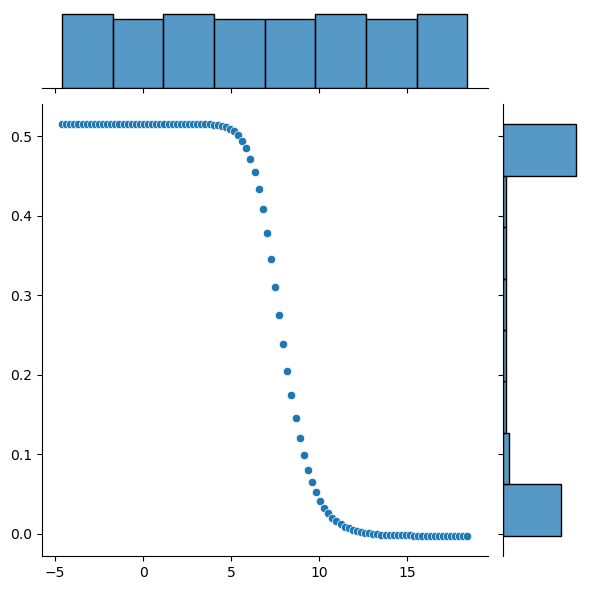

In [74]:
sns.jointplot(x=np.log(param_range), y=test_mean)

**The lambda value where the R2 is maximum is to be taken for the model.** 

In [75]:
np.where(test_mean == max(test_mean))

(array([33], dtype=int64),)

In [76]:
# The validation curve gives best R2 score for the alpha value 21.5
param_range[33]

21.544346900318846

In [77]:
# Fitting the model with the alpha which is at the 33rd position
lrid_best = Ridge(alpha = param_range[33])

In [78]:
lrid_best.fit(X_train_s, y_train)

Ridge(alpha=21.544346900318846)

In [79]:
y_train_prn = lrid_best.predict(X_train_s)
y_test_prn = lrid_best.predict(X_test_s)

In [80]:
r2_score(y_train, y_train_prn)

0.5261625098380613

In [81]:
r2_score(y_test, y_test_prn)

0.5606250743365544

In [82]:
print("MSE:", metrics.mean_squared_error(y_test,y_test_prn))
print('MAE:', metrics.mean_absolute_error(y_test,y_test_prn))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_test_prn)))
print("R2 score:", metrics.r2_score(y_test, y_test_prn))


MSE: 72597017.14016923
MAE: 6874.693005515305
RMSE: 8520.388320972774
R2 score: 0.5606250743365544


In [83]:
print(lrid_best.intercept_, lrid_best.coef_)

75338.86468135325 [-362.84755763  103.70251324 2714.84603378   34.73122862  -50.72786847
 3435.32480716 7718.6921433 ]


### OBSERVATIONS
* Even after using Ridge Regularization, the R2 score comes to 56% which is almost same without using Regularization.
* Therefore, Decision Tree Regressor is tried.

## DECISION TREE REGRESSOR

In [84]:
from sklearn import tree

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [86]:
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [87]:
regtree = tree.DecisionTreeRegressor()

In [88]:
regtree.fit(X_train_s, y_train)

DecisionTreeRegressor()

In [89]:
y_train_pd = regtree.predict(X_train_s)
y_test_pd = regtree.predict(X_test_s)

In [90]:
metrics.mean_squared_error(y_test, y_test_pd)

90503432.61519308

In [91]:
r2_score(y_train, y_train_pd)

1.0

In [92]:
r2_score(y_test, y_test_pd)

0.45225106286654204

In [93]:
print("MSE:", metrics.mean_squared_error(y_test,y_test_pd))
print('MAE:', metrics.mean_absolute_error(y_test,y_test_pd))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_test_pd)))
print("R2 score:", metrics.r2_score(y_test, y_test_pd))

MSE: 90503432.61519308
MAE: 7050.861635220126
RMSE: 9513.329207758612
R2 score: 0.45225106286654204


* The Decision Tree regressor has been fit without specifying any parameters.
* The test score comes out ot be 42% which is lower than the previously used techniques.
* Cross Validation Techniques such as Grid search is used to find the best parameters to fit the model to enhance the 
scores.

#### DECISION TREE USING CROSS VALIDATION

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
params = {
    'max_depth' :list(range(1,20)),
    'max_leaf_nodes' : list(range(2, 100, 10)),
    'min_samples_leaf' : list(range(1, 100, 10)),
    'min_samples_split': [20,40,60,80,100]
}

In [96]:
regtree_s = tree.DecisionTreeRegressor()

In [97]:
random = GridSearchCV(regtree_s, params, cv = 3, scoring='neg_mean_squared_error',verbose = 1)

In [98]:
random.fit(X_train_s, y_train)

Fitting 3 folds for each of 9500 candidates, totalling 28500 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'max_leaf_nodes': [2, 12, 22, 32, 42, 52, 62, 72, 82,
                                            92],
                         'min_samples_leaf': [1, 11, 21, 31, 41, 51, 61, 71, 81,
                                              91],
                         'min_samples_split': [20, 40, 60, 80, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [99]:
print(random.best_estimator_)

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=12, min_samples_leaf=21,
                      min_samples_split=40)


In [100]:
regtree_n = tree.DecisionTreeRegressor(max_depth=6, max_leaf_nodes=12, min_samples_leaf=21, min_samples_split=20)

In [101]:
regtree_n.fit(X_train_s, y_train)

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=12, min_samples_leaf=21,
                      min_samples_split=20)

In [102]:
y_train_pdn = regtree_n.predict(X_train_s)
y_test_pdn = regtree_n.predict(X_test_s)

In [103]:
r2_score(y_train, y_train_pdn)

0.6245333202183443

In [104]:
r2_score(y_test, y_test_pdn)

0.6332582550809569

In [105]:
print("MSE:", metrics.mean_squared_error(y_test,y_test_pdn))
print('MAE:', metrics.mean_absolute_error(y_test,y_test_pdn))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_test_pdn)))
print("R2 score:", metrics.r2_score(y_test, y_test_pdn))

MSE: 60595985.76705579
MAE: 6142.615734643206
RMSE: 7784.342346470625
R2 score: 0.6332582550809569


**OBSERVATIONS:**
* The score has significantly improved from 42% to 63%.
* Compared to the Linear Regression model, the score has improved from 56% to 63%.
* Therefore, Random Forest Regressor is tried with the data to check whether the scores can be improved.


#### PLOTTING THE DECISION TREE

In [106]:
import pydotplus
from IPython.display import Image

In [107]:
dot_data = tree.export_graphviz(regtree_n, out_file=None)

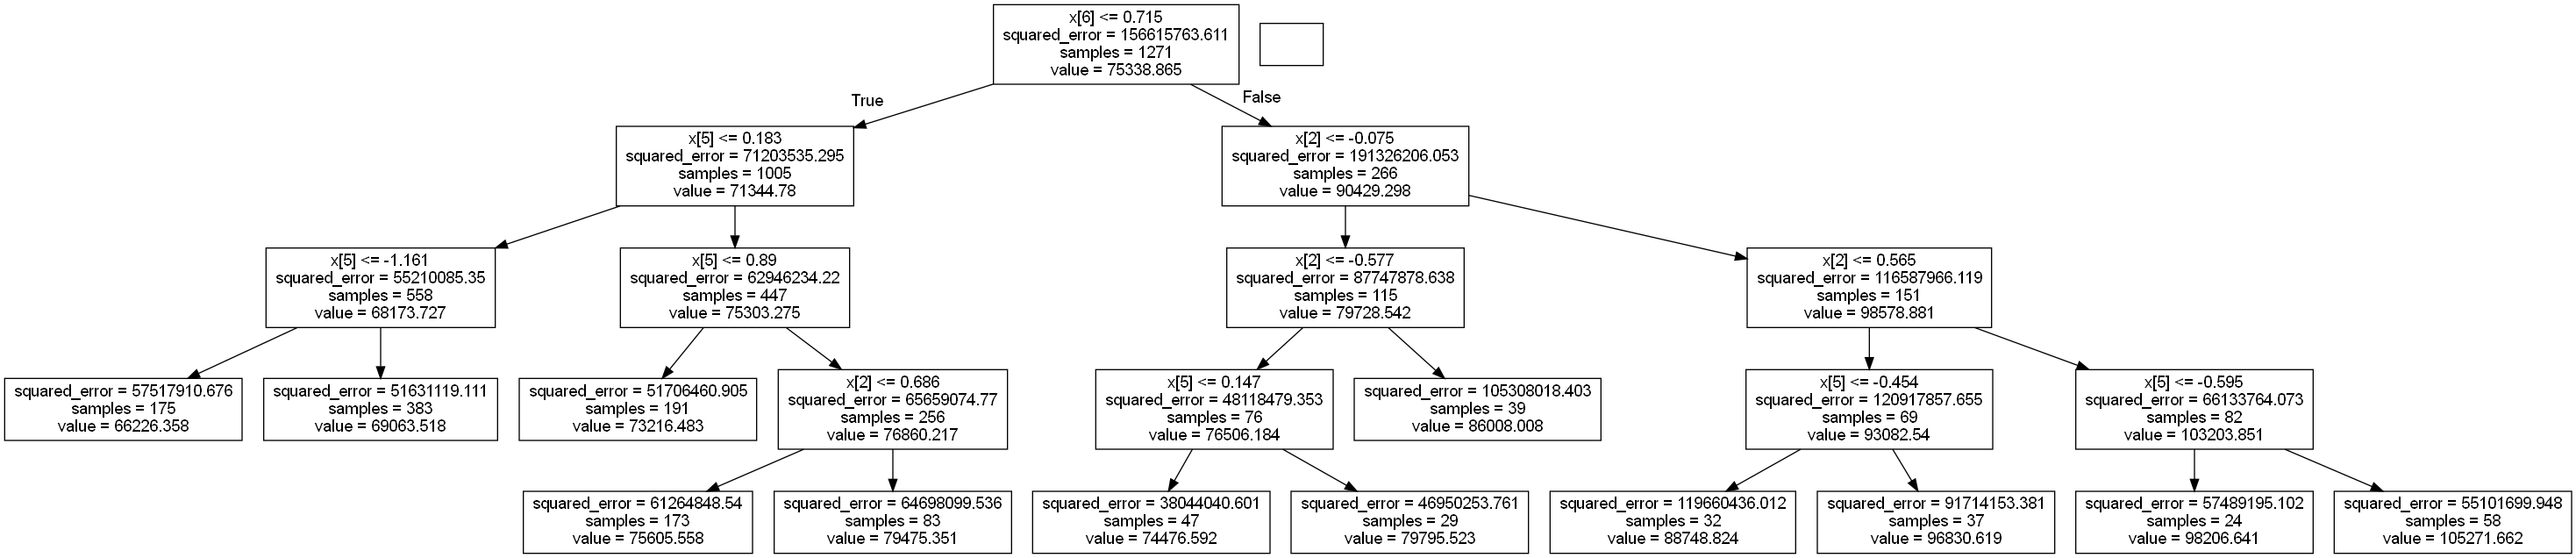

In [108]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#### FITTING THE DATA INTO RANDOM FOREST REGRESSOR

In [109]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [111]:
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [112]:
rfr = RandomForestRegressor()

In [113]:
rfr.fit(X_train_s, y_train)

RandomForestRegressor()

In [114]:
y_train_f = rfr.predict(X_train_s)
y_test_f = rfr.predict(X_test_s)

In [115]:
r2_score(y_train, y_train_f)

0.9477164550681886

In [116]:
r2_score(y_test, y_test_f)

0.6736107403299085

In [117]:
params_f = {
    'max_depth' :list(range(1,20)),
    'n_estimators': list(range(100,10000,100)),
    'min_samples_split': [10,20,30,40,50,60,70,80,90,100]
}

In [118]:
rfr_s = RandomForestRegressor()

In [119]:
random_f = RandomizedSearchCV(rfr_s, params_f,cv =10, n_jobs=-1, scoring='neg_mean_squared_error')

In [120]:
random_f.fit(X_train_s, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'min_samples_split': [10, 20, 30, 40,
                                                              50, 60, 70, 80,
                                                              90, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900, 2000,
                                                         2100, 2200, 2300, 2400,
                                                         2500, 2600, 2700, 2800,
                                                         2900, 3000, ...]},
                   scoring='neg_mean_squared_error')

In [121]:
print(random_f.best_estimator_)

RandomForestRegressor(max_depth=7, min_samples_split=10, n_estimators=5000)


In [122]:
rfr_n = RandomForestRegressor(max_depth=16, min_samples_split=10, n_estimators=6300)

In [123]:
rfr_n.fit(X_train_s, y_train)

RandomForestRegressor(max_depth=16, min_samples_split=10, n_estimators=6300)

In [124]:
y_train_fn = rfr_n.predict(X_train_s)
y_test_fn = rfr_n.predict(X_test_s)

In [125]:
r2_score(y_train, y_train_fn)

0.8506034848248201

In [126]:
r2_score(y_test, y_test_fn)

0.6658939778684111

In [127]:
print("MSE:", metrics.mean_squared_error(y_test,y_test_fn))
print('MAE:', metrics.mean_absolute_error(y_test,y_test_fn))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_test_fn)))
print("R2 score:", metrics.r2_score(y_test, y_test_fn))

MSE: 55203652.27646092
MAE: 5944.002825451788
RMSE: 7429.916034280665
R2 score: 0.6658939778684111


**OBSERVATIONS:**
* The score of RandomForest Regressor without specifying any parameters is 68% which is slightly more than the models tried
  with Randomized Search Cross Validation which is 66.5%.
* However, this score seems to be the highest score among all the models tested.

####  The data is tried in the KNN Regression model to see whether the scores improve.

In [128]:
from sklearn.neighbors import KNeighborsRegressor

In [129]:
knn = KNeighborsRegressor()

In [130]:
knn.fit(X_train_s, y_train)

KNeighborsRegressor()

In [131]:
y_train_k = knn.predict(X_train_s)
y_test_k = knn.predict(X_test_s)

In [132]:
r2_score(y_train, y_train_k)

0.6815406276253726

In [133]:
r2_score(y_test, y_test_k)

0.5264659915620664

In [134]:
params_g = {
    'n_neighbors': list(range(1,100)),
    'leaf_size':list(range(1,100))
}

In [135]:
random_g = RandomizedSearchCV(knn, params_g, cv =10, scoring = 'neg_mean_squared_error')

In [136]:
random_g.fit(X_train_s, y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsRegressor(),
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30, ...]},
                   scoring='neg_mean_squared_error')

In [137]:
random_g.best_estimator_

KNeighborsRegressor(leaf_size=61, n_neighbors=12)

In [138]:
knn_n = KNeighborsRegressor(leaf_size=17, n_neighbors=26)

In [139]:
knn_n.fit(X_train_s, y_train)

KNeighborsRegressor(leaf_size=17, n_neighbors=26)

In [140]:
y_train_kn = knn_n.predict(X_train_s)
y_test_kn = knn_n.predict(X_test_s)

In [141]:
r2_score(y_train, y_train_kn)

0.5861058489620952

In [142]:
r2_score(y_test, y_test_kn)

0.5905675417625309

In [143]:
print("MSE:", metrics.mean_squared_error(y_test,y_test_kn))
print('MAE:', metrics.mean_absolute_error(y_test,y_test_kn))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_test_kn)))
print("R2 score:", metrics.r2_score(y_test, y_test_kn))

MSE: 67649684.70498239
MAE: 6646.147866473149
RMSE: 8224.942839010031
R2 score: 0.5905675417625309


#### Gradient Boosting Regressor is tried with the data to check the scores

In [144]:
from sklearn.ensemble import GradientBoostingRegressor

In [145]:
gbr = GradientBoostingRegressor(n_estimators = 1000, max_depth= 3, min_samples_split = 5, learning_rate = 0.01)

In [146]:
gbr.fit(X_train_s, y_train)

GradientBoostingRegressor(learning_rate=0.01, min_samples_split=5,
                          n_estimators=1000)

In [147]:
y_train_g = gbr.predict(X_train_s)
y_test_g = gbr.predict(X_test_s)

In [148]:
r2_score(y_train, y_train_g)

0.7177411990089134

In [149]:
r2_score(y_test, y_test_g)

0.6470280833966799

In [150]:
print("MSE:", metrics.mean_squared_error(y_test,y_test_g))
print('MAE:', metrics.mean_absolute_error(y_test,y_test_g))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_test_g)))
print("R2 score:", metrics.r2_score(y_test, y_test_g))

MSE: 58320825.2973401
MAE: 6077.701781444949
RMSE: 7636.807271192596
R2 score: 0.6470280833966799


#### Among all the models tested, the Random Forest Regressor gives the highest R2 score, thus the Random Forest Regressor model is preferred over all the other models.